In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import random
import os
import cv2

In [2]:
IMAGE_WIDTH=40
IMAGE_HEIGHT=40
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
# face_cascade = cv2.CascadeClassifier('C:/ProgramData/Anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('C:/ProgramData/Anaconda3/Lib/site-packages/cv2/data/haarcascade_eye.xml')
# dirList=['bonghwang','dohwa','gongjak','horang']

# for dirname in dirList:
#     train_dir=os.listdir("train/"+dirnmae)
#     for filename in train_dir:
#         img=cv2.imread("train/"+filename)
#         faces = face_cascade.detectMultiScale(img, 1.3,5)
#         for (x,y,w,h) in faces:
#             cropped = img[y :y + h, x:x + w]
#             cv2.imwrite("train/face/"+dirname+".face."+i+'.jpg', cropped)           

In [4]:
# train_face_dir=os.listdir("train/face/")
# for filename in train_face_dir:
#     img=cv2.imread("train/face/"+filename)
#     eyes = eye_cascade.detectMultiScale(img)
#     try: 
#         for (ex,ey,ew,eh) in [eyes[0]]: # 사진의 왼쪽
#             dst = img[ey-int(eh*0.01):(ey+eh+int(eh*0.01)),ex-int(ew*0.1):(ex+ew+int(ew*0.1))]
#             cv2.imwrite("train/eyes/"+filename.split('.')[0]+".eye_l."+filename.split('.')[2]+"."+filename.split('.')[3],dst)

#         for (ex,ey,ew,eh) in [eyes[1]]: # 사진의 오른쪽
#             dst = img[ey-int(eh*0.01):(ey+eh+int(eh*0.01)),ex-int(ew*0.1):(ex+ew+int(ew*0.1))]
#             cv2.imwrite("train/eyes/"+filename.split('.')[0]+".eye_r."+filename.split('.')[2]+"."+filename.split('.')[3],dst)
#     except:
#         pass          

In [5]:
# dirList=['bonghwang','dohwa','gongjak','horang']

# categories=[]
# train_dir_list=[]
# for dirnames in dirList:
#     train_dir=os.listdir("train1/"+dirnames)
#     categories.append(dirnames)
#     for i in train_dir:
#         train_dir_list.append(train_dir)
train_dir=os.listdir("train1/")
categories=[]
for filename in train_dir:
    category=filename.split(".")[0]
    if category == 'bonghwang':
        categories.append('bonghwang')
    elif category == 'dohwa':
        categories.append('dohwa')
    elif category == 'gongjak':
            categories.append('gongjak')
    elif category == 'horang':
        categories.append('horang')
    elif category == 'so':
        categories.append('so')
    elif category == 'yong':
            categories.append('yong')

In [6]:
df=pd.DataFrame({'filename':train_dir,'category':categories})
df

,filename,category
0,bonghwang.00001.PNG,bonghwang
1,bonghwang.00002.PNG,bonghwang
2,bonghwang.00003.PNG,bonghwang
3,bonghwang.00004.PNG,bonghwang
4,bonghwang.00005.PNG,bonghwang
...,...,...
1195,yong.00196.JPG,yong
1196,yong.00197.JPG,yong
1197,yong.00198.JPG,yong
1198,yong.00199.JPG,yong


In [7]:
df.category.value_counts()

dohwa        200
gongjak      200
horang       200
yong         200
so           200
bonghwang    200
Name: category, dtype: int64

In [8]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [9]:
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

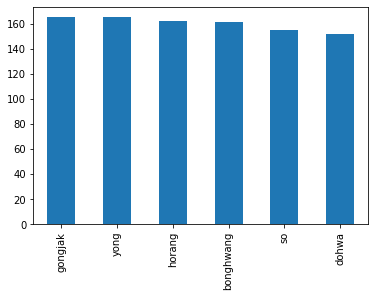

In [10]:
train_df['category'].value_counts().plot.bar()

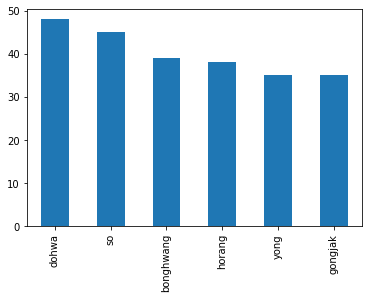

In [11]:
validate_df['category'].value_counts().plot.bar()

In [12]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=10

In [13]:
train_datagen = ImageDataGenerator(rotation_range=20,
                                   rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   brightness_range=[0.5,1],
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

In [14]:
train_generator=train_datagen.flow_from_dataframe(train_df,
                                                  'train1/',
                                                  x_col='filename',
                                                  y_col='category',
                                                  target_size=IMAGE_SIZE,
                                                  class_mode='categorical',
                                                  batch_size=batch_size
                                                 )

Found 960 validated image filenames belonging to 6 classes.


In [15]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                              "train1/",
                                                              x_col='filename',
                                                              y_col='category',
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='categorical',
                                                              batch_size=batch_size
                                                             )

Found 240 validated image filenames belonging to 6 classes.


In [16]:
from keras.models import Sequential
from keras.layers import *

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax')) # 2 because we have cat and dog classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 38, 38, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 38, 38, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 19, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 17, 17, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [18]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [19]:
earlystop = EarlyStopping(patience=10),
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=2,
                                           verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [20]:
history = model.fit_generator(train_generator,
                              epochs=300,
                              validation_data=validation_generator,
                              validation_steps=total_validate//batch_size,
                              steps_per_epoch=total_train//batch_size,
                              callbacks=[earlystop,learning_rate_reduction])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/300
96/96 [==============================] - 4s 45ms/step - loss: 2.7183 - accuracy: 0.2198 - val_loss: 3.3285 - val_accuracy: 0.1583
Epoch 2/300
96/96 [==============================] - 1s 15ms/step - loss: 2.2719 - accuracy: 0.2427 - val_loss: 4.9865 - val_accuracy: 0.1583
Epoch 3/300
93/96 [============================>.] - ETA: 0s - loss: 2.1207 - accuracy: 0.2720
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
96/96 [==============================] - 1s 15ms/step - loss: 2.1145 - accuracy: 0.2771 - val_loss: 6.9164 - val_accuracy: 0.1583
Epoch 4/300
96/96 [==============================] - 1s 15ms/step - loss: 2.1747 - accuracy: 0.2667 - val_loss: 4.9840 - val_accuracy: 0.1583
Epoch 5/300
96/96 [==============================] - 1s 15ms/step - loss: 2.0311 - accuracy: 0.2719 - val_loss: 2.8340 - val_accuracy: 0.2000
Epoch 6/300
96/96 [==============================] 

In [21]:
model.evaluate(train_generator)

96/96 [==============================] - 1s 10ms/step - loss: 1.3597 - accuracy: 0.4896


[1.359655737876892, 0.4895833432674408]

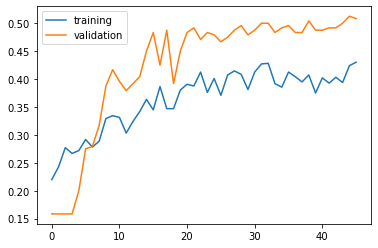

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [23]:
# test data input

In [24]:
face_cascade = cv2.CascadeClassifier('C:/ProgramData/Anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/ProgramData/Anaconda3/Lib/site-packages/cv2/data/haarcascade_eye.xml')

test_dir=os.listdir("test/")
for filename in test_dir:
    img=cv2.imread("test/"+filename)
    faces = face_cascade.detectMultiScale(img, 1.3,5)
    for (x,y,w,h) in faces:
        cropped = img[y :y + h, x:x + w]
        cv2.imwrite("test/face/"+"face."+filename, cropped)
            

In [25]:
test_face_dir=os.listdir("test/face/")
for filename in test_face_dir:
    img=cv2.imread("test/face/"+filename)
    eyes = eye_cascade.detectMultiScale(img)
    try: 
        for (ex,ey,ew,eh) in [eyes[0]]: # 사진의 왼쪽
            dst = img[ey-int(eh*0.01):(ey+eh+int(eh*0.01)),ex-int(ew*0.1):(ex+ew+int(ew*0.1))]
            cv2.imwrite("test/eyes/"+"eye_l."+filename,dst)

        for (ex,ey,ew,eh) in [eyes[1]]: # 사진의 오른쪽
            dst = img[ey-int(eh*0.01):(ey+eh+int(eh*0.01)),ex-int(ew*0.1):(ex+ew+int(ew*0.1))]
            cv2.imwrite("test/eyes/"+"eye_r."+filename,dst)
    except:
        pass          

In [26]:
test_eyes_dir=os.listdir("test/eyes/")
print(test_eyes_dir)
test_df = pd.DataFrame({'filename': test_eyes_dir})
test_df

['eye_l.face.hanjimin.jpg', 'eye_l.face.hanyeseul.png', 'eye_l.face.kimyeona.jpg', 'eye_l.face.packchanwook.jpg', 'eye_r.face.hanjimin.jpg', 'eye_r.face.hanyeseul.png', 'eye_r.face.kimyeona.jpg', 'eye_r.face.packchanwook.jpg']


,filename
0,eye_l.face.hanjimin.jpg
1,eye_l.face.hanyeseul.png
2,eye_l.face.kimyeona.jpg
3,eye_l.face.packchanwook.jpg
4,eye_r.face.hanjimin.jpg
5,eye_r.face.hanyeseul.png
6,eye_r.face.kimyeona.jpg
7,eye_r.face.packchanwook.jpg


In [27]:
nb_samples = test_df.shape[0]

In [28]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(test_df,
                                              "test/eyes/",
                                              x_col='filename',
                                              y_col=None,
                                              class_mode=None,
                                              target_size=IMAGE_SIZE,
                                              batch_size=batch_size,
                                              shuffle=False)

Found 8 validated image filenames.


In [29]:
predict = model.predict_generator(test_generator,steps=np.ceil(nb_samples/batch_size))

Instructions for updating:
Please use Model.predict, which supports generators.


In [30]:
predict

array([[1.2706724e-01, 3.6900848e-01, 6.0022894e-02, 3.7614527e-01,
        2.3938345e-02, 4.3817751e-02],
       [4.0383253e-01, 9.5286138e-02, 4.6444837e-02, 3.5672113e-01,
        5.4687914e-02, 4.3027502e-02],
       [4.0621575e-02, 1.3353588e-01, 1.2267620e-01, 4.2095891e-01,
        9.5404588e-02, 1.8680288e-01],
       [8.2138349e-06, 3.7158217e-05, 1.0836251e-04, 9.9984586e-01,
        5.4710192e-08, 3.5588465e-07],
       [3.7063230e-02, 5.7151389e-01, 1.2959275e-01, 2.1891174e-01,
        2.2172650e-02, 2.0745767e-02],
       [2.7823013e-01, 1.3623877e-01, 8.3507009e-02, 3.7999666e-01,
        5.4187831e-02, 6.7839608e-02],
       [4.5385283e-01, 4.9386673e-02, 8.0319578e-03, 3.8067269e-01,
        3.3329390e-02, 7.4726515e-02],
       [9.1439918e-02, 1.8986993e-02, 8.9850253e-04, 7.6599211e-01,
        1.6803088e-02, 1.0587937e-01]], dtype=float32)

In [31]:
test_df['category'] = np.argmax(predict, axis=-1)

In [32]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [33]:
test_df

,filename,category
0,eye_l.face.hanjimin.jpg,horang
1,eye_l.face.hanyeseul.png,bonghwang
2,eye_l.face.kimyeona.jpg,horang
3,eye_l.face.packchanwook.jpg,horang
4,eye_r.face.hanjimin.jpg,dohwa
5,eye_r.face.hanyeseul.png,horang
6,eye_r.face.kimyeona.jpg,bonghwang
7,eye_r.face.packchanwook.jpg,horang
